In [48]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path


In [53]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'
events = pd.read_csv(path + 'events_csv.csv')
snr_array = pd.read_csv(path + 'station_data_hypdists_snrs.csv')
snr_array

,Sta,Lat,Lon,Depth(m),2009_hyp_dist_km,2013_hyp_dist_km,2018_hyp_dist_km,snrs_2009,snrs_2013,snrs_2018
0,BCWB,24.2184,121.6891,-192,69.496535,74.182696,7.066640,-,-,-
1,TRKB,24.1614,121.6127,-192,61.088805,65.767547,9.697232,-,1152.20250487,3719.0718215
2,NTTB,24.1728,121.5259,-175,60.587926,65.180780,18.587874,-,-,-
3,SJNB,24.1073,121.6006,-193,54.988063,59.668808,12.226300,-,1534.07924347,130.500478359
4,HGSB,23.4903,121.4237,-266,15.739505,11.125139,79.319331,-,439.289654937,372.018353576
5,CHMB,23.4868,121.4703,-191,15.969342,11.924641,78.079695,-,348.253341927,40.3376474275
6,SSNB,23.4423,121.3981,-185,21.504342,16.833483,85.224271,-,766.890947625,129.005945014
7,ZANB,23.3947,121.4585,-218,26.068219,21.740867,88.175343,-,3295.27964074,106.461336916
8,FBRB,23.1406,121.2796,-200,56.994188,52.307853,120.756809,-,410.300738921,80.3548941939
9,SSTB,23.1340,121.3782,-199,55.447392,50.858196,118.191393,-,359.179515365,47.0870229521


In [54]:
# Figure out the "good" and "bad" performing waveforms using an L2 norm

mcmc_results = pd.read_csv(path + 'mcmc_arrays/mcmc_results_summary.csv')
mcmc_results_array = mcmc_results.values
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time
0,2013-10-31_M6.3,6.3,TRKB,65,25,2.046405,0.068480,11.324532,0.189321,11.4
1,2013-10-31_M6.3,6.3,SJNB,59,25,2.202715,0.085420,11.181835,0.148766,11.2
2,2013-10-31_M6.3,6.3,HGSB,11,20,6.258803,0.084021,10.333483,0.123332,10.4
3,2013-10-31_M6.3,6.3,CHMB,11,20,10.064910,0.078963,10.193163,0.094482,10.2
4,2013-10-31_M6.3,6.3,SSNB,16,15,8.211341,0.228966,10.204646,0.094793,10.3
5,2013-10-31_M6.3,6.3,ZANB,21,20,16.394358,0.064127,10.174274,0.103334,10.2
6,2013-10-31_M6.3,6.3,FBRB,52,30,1.611918,0.075873,11.237477,0.117523,11.3
7,2013-10-31_M6.3,6.3,SSTB,50,30,7.943502,0.074450,10.310023,0.119879,10.4
8,2013-10-31_M6.3,6.3,DONB,67,30,1.015153,0.076568,11.443177,0.161560,11.5
9,2018-02-04_M6.1,6.1,TRKB,9,13,5.747254,0.593115,10.512826,0.223463,10.6


In [55]:
mcmc_results_array[0]

array(['2013-10-31_M6.3', 6.3, 'TRKB', 65, 25, 2.0464054751287275,
       0.0684803468880364, 11.324531787608436, 0.1893213957680763, 11.4], dtype=object)

TRKB


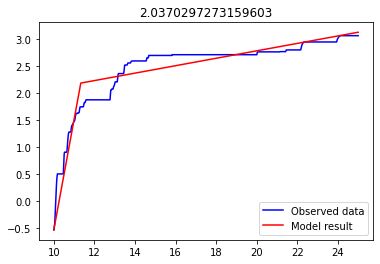

SJNB


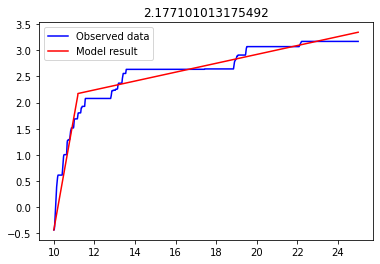

HGSB


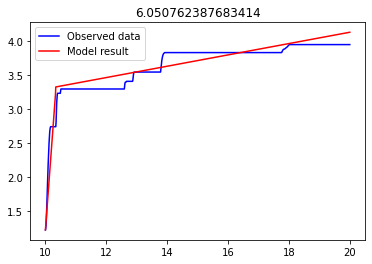

CHMB


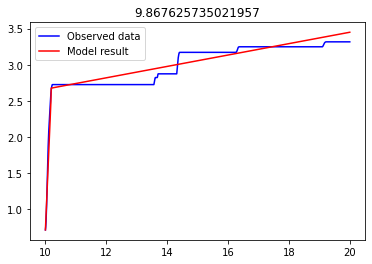

SSNB


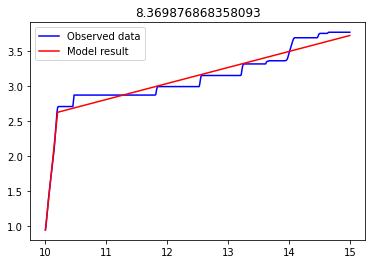

ZANB


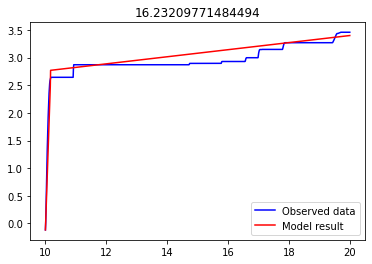

FBRB


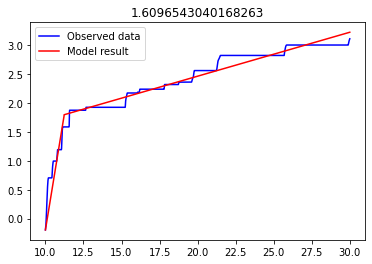

SSTB
DONB


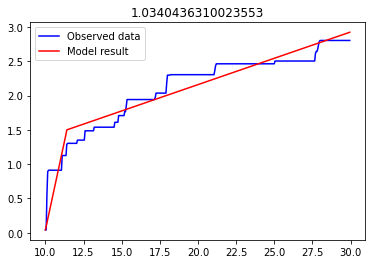

TRKB


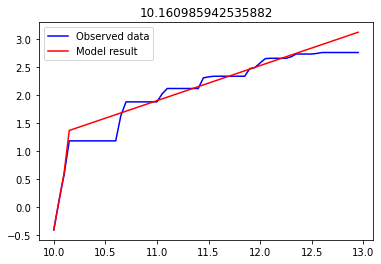

SJNB


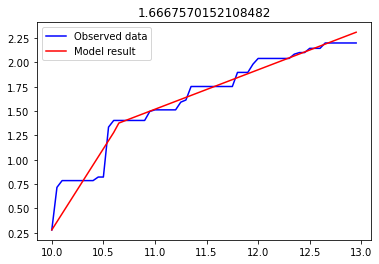

HGSB


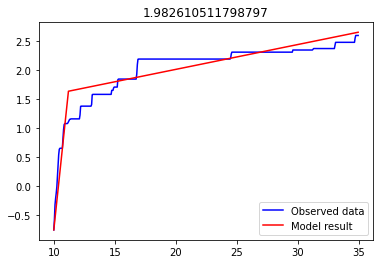

CHMB


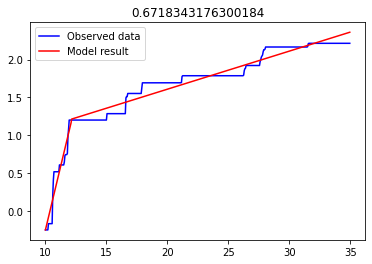

SSNB


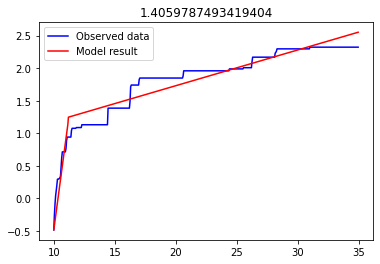

ZANB


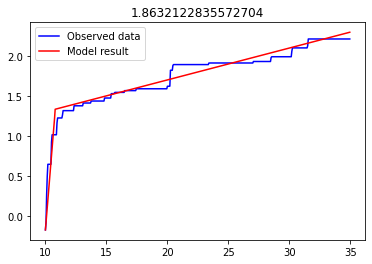

FBRB


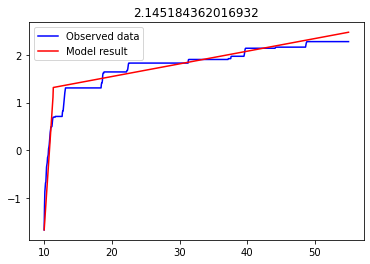

SSTB


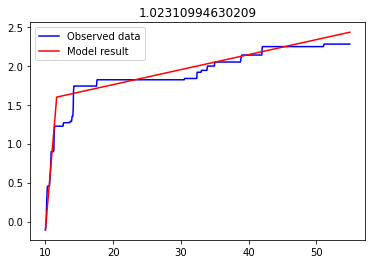

In [89]:
mcmc_results = pd.read_csv(path + 'mcmc_arrays/mcmc_results_summary.csv')
mcmc_results_array = mcmc_results.values

counter = 0
results = []

for idx in range(len(mcmc_results_array)):
    
    eq_id = str(mcmc_results_array[idx,0])
    sta = str(mcmc_results_array[idx,2])
    hypdist = int(mcmc_results_array[idx,3])
    
    print(sta)

    # print(eq_id, sta, hypdist)

    # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
    xlow = 10
    xhigh = get_xhigh(eq_id)
    
    try:
        # Read in data - peak strain data only has the ones with SNR > 2
        pst = read(path + 'filtered_abs_peak_post_p/' + eq_id + '/' + sta + '.mseed')
        counter += 1
        # pst.plot()
        # plt.plot(pst[0].times(), pst[0].data)
        # plt.semilogy()
        # plt.show()

    except:
        continue # Skips to next row in dist_array/next station

    times = pst[0].times()
    data = pst[0].data
    log10_data = np.log10(data)
    samp_rate = pst[0].stats.sampling_rate
    
    vec_start = int(xlow*samp_rate)
    vec_end = int(xhigh*samp_rate)

    xobserved = times[vec_start:vec_end]
    yobserved = log10_data[vec_start:vec_end]
    x0 = xobserved[0]
    y0 = yobserved[0]
    
    m1_slope = float(mcmc_results_array[idx,5])
    m2_slope = float(mcmc_results_array[idx,6])
    int_time = float(mcmc_results_array[idx,7])
    
    diff = m1_slope - m2_slope
    
    int_x_samp = int(int_time*samp_rate)
    
    # mx + b for the lines
    
    b1 = y0 - m1_slope*x0
    b2 = m1_slope*int_time + b1 - m2_slope*int_time
    
    line1_xobs = times[vec_start:int_x_samp]
    line1_ymodel = m1_slope * line1_xobs + b1
    line1_yobs = log10_data[vec_start:int_x_samp]
    
    line2_xobs = times[int_x_samp:vec_end]
    line2_ymodel = m2_slope * line2_xobs + b2
    line2_yobs = log10_data[int_x_samp:vec_end]
    
    xobs = np.append(line1_xobs, line2_xobs)
    ymodel = np.append(line1_ymodel, line2_ymodel)
    yobs = np.append(line1_yobs, line2_yobs)
    
    error_line1 = np.sqrt(np.sum(np.square(np.subtract(line1_ymodel, line1_yobs))))
    error_line2 = np.sqrt(np.sum(np.square(np.subtract(line2_ymodel, line2_yobs))))
    
    error = np.sqrt(np.sum(np.square(np.subtract(ymodel, yobs))))
    # print(error)
    
#     if error <= 15:
#         results.append('g')
#     else:
#         results.append('b')

    # if diff > 0.1 and error_line1 < 5 and error_line2 < 6.5:
    if diff > 0 and error_line1 < 3.5 and error_line2 < 6.5:
        results.append('g')
        plt.title(m1_slope)
        # plt.title('Line 1 error: ' + str(round(error_line1,3)) + ', line 2 error: ' + str(round(error_line2,3)))
        plt.plot(xobs, yobs, color = 'blue', label = 'Observed data')
        plt.plot(xobs, ymodel, color = 'red', label = 'Model result')
        plt.legend()
        plt.show()
    else:
        results.append('b')
        # plt.title(m1_slope)
        # # plt.title('Line 1 error: ' + str(round(error_line1,3)) + ', line 2 error: ' + str(round(error_line2,3)) + '\ndiff: ' + str(round(diff,3)) + ', M2 slope: ' + str(round(m2_slope,4)))
        # plt.plot(xobs, yobs, color = 'blue', label = 'Observed data')
        # plt.plot(xobs, ymodel, color = 'red', label = 'Model result')
        # plt.legend()
        # plt.show()

mcmc_results['two_line_fit_qual'] = results
    
    # plt.title('Line 1 error: ' + str(round(error_line1,3)) + ', line 2 error: ' + str(round(error_line2,3)) + '\ndiff: ' + str(round(diff,3)) + ', M2 slope: ' + str(round(m2_slope,4)))
    # plt.plot(xobs, yobs, color = 'blue', label = 'Observed data')
    # plt.plot(xobs, ymodel, color = 'red', label = 'Model result')
    # plt.legend()
    # plt.show()

        

In [90]:
mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,two_line_fit_qual
0,2013-10-31_M6.3,6.3,TRKB,65,25,2.037030,0.068694,11.330833,0.189542,11.4,g
1,2013-10-31_M6.3,6.3,SJNB,59,25,2.177101,0.084947,11.198908,0.149086,11.2,g
2,2013-10-31_M6.3,6.3,HGSB,11,20,6.050762,0.083554,10.348307,0.124362,10.4,g
3,2013-10-31_M6.3,6.3,CHMB,11,20,9.867626,0.078880,10.198883,0.096252,10.2,g
4,2013-10-31_M6.3,6.3,SSNB,16,15,8.369877,0.228925,10.200698,0.094635,10.3,g
5,2013-10-31_M6.3,6.3,ZANB,21,20,16.232098,0.064102,10.177930,0.105905,10.2,g
6,2013-10-31_M6.3,6.3,FBRB,52,30,1.609654,0.076036,11.237796,0.117444,11.3,g
7,2013-10-31_M6.3,6.3,SSTB,50,30,7.683661,0.074869,10.334603,0.125446,10.4,b
8,2013-10-31_M6.3,6.3,DONB,67,30,1.034044,0.076751,11.411517,0.161596,11.5,g
9,2018-02-04_M6.1,6.1,TRKB,9,13,10.160986,0.624036,10.175736,0.173316,10.2,g


In [91]:
mcmc_results.to_csv(path + 'mcmc_arrays/mcmc_results_summary_with_quality.csv', index = False)

In [92]:
good_results = mcmc_results[mcmc_results['two_line_fit_qual'] == 'g']
bad_results = mcmc_results[mcmc_results['two_line_fit_qual'] == 'b']

bad_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,two_line_fit_qual
7,2013-10-31_M6.3,6.3,SSTB,50,30,7.683661,0.074869,10.334603,0.125446,10.4,b


In [93]:
# Calculate earthquake source durations

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(6,7.25,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)
    

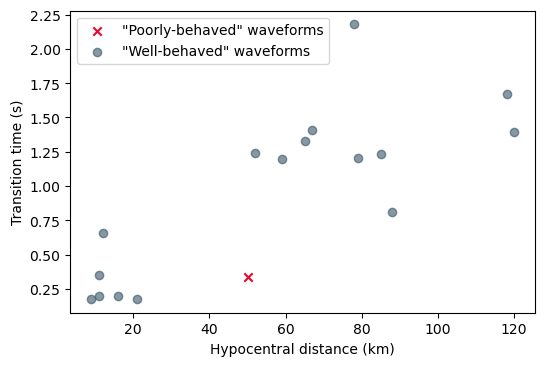

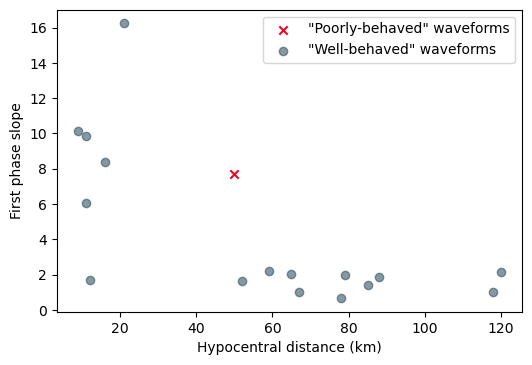

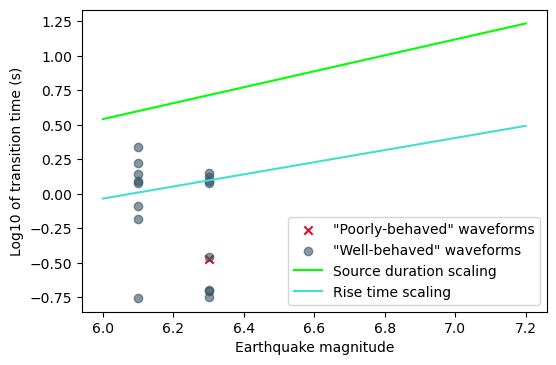

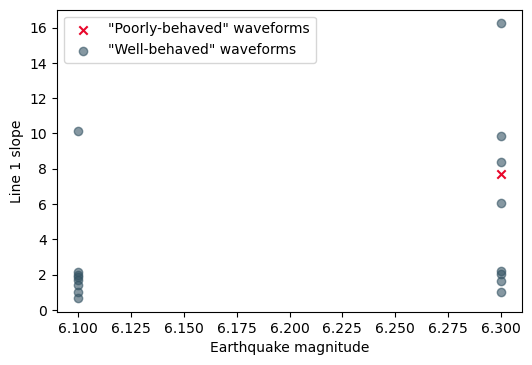

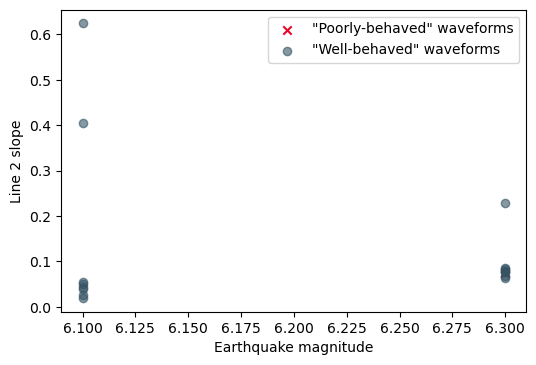

In [94]:
dpi = 100

plt.figure(dpi = dpi)
plt.scatter(bad_results.hypdist.values, bad_results.xinter.values-10, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.hypdist.values, good_results.xinter.values-10, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Hypocentral distance (km)')
plt.ylabel('Transition time (s)')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_hypdist_vs_transtime.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.hypdist.values, bad_results.m1.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.hypdist.values, good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Hypocentral distance (km)')
plt.ylabel('First phase slope')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_hypdist_vs_transtime.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.mag.values, np.log10(bad_results.xinter.values-10), marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.mag.values, np.log10(good_results.xinter.values-10), marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Log10 of transition time (s)')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_transtime.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.mag.values, bad_results.m1.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.mag.values, good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m1.png', format = 'PNG')
# plt.close()

plt.figure(dpi = dpi)
plt.scatter(bad_results.mag.values, bad_results.m2.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
plt.scatter(good_results.mag.values, good_results.m2.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 2 slope')
plt.legend()
plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m2.png', format = 'PNG')
# plt.close()